## This workbook goes through several machine learning algorithms with a single dataset


In [1]:
# Load useful packages
import seaborn as sns
from pandas import Series,DataFrame
import pandas as pd
import matplotlib as mpl
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')
print(alt.renderers.active)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

from scipy import sparse
import io


notebook


/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# load the dataset
dtype = {
                    'class_label' : 'category', # 0 = background; 1 = signal
                    'lepton 1 pT' : 'float', 
                    'lepton 1 eta': 'float', 
                    'lepton 1 phi': 'float', 
                    'lepton 2 pT' : 'float', 
                    'lepton 2 eta': 'float', 
                    'lepton 2 phi': 'float', 
                    'missing energy magnitude': 'float', 
                    'missing energy phi'      : 'float', 
                    'MET_rel'     : 'float', 
                    'axial MET'   : 'float', 
                    'M_R'         : 'float', 
                    'M_TR_2'      : 'float', 
                    'R'           : 'float', 
                    'MT2'         : 'float', 
                    'S_R'         : 'float', 
                    'M_Delta_R'   : 'float', 
                    'dPhi_r_b'    : 'float', 
                    'cos(theta_r1)': 'float', 
}
raw_data = pd.read_csv('SUSY.csv',nrows=500000,header=None,dtype=dtype)
all_vars = [key for key in dtype.keys()]
df = raw_data
df.columns = all_vars


In [3]:
# have to fix class_label to category with a little bit of work. 
df.class_label = df.class_label.astype('int').astype('category')
df.dtypes

class_label                 category
lepton 1 pT                  float64
lepton 1 eta                 float64
lepton 1 phi                 float64
lepton 2 pT                  float64
lepton 2 eta                 float64
lepton 2 phi                 float64
missing energy magnitude     float64
missing energy phi           float64
MET_rel                      float64
axial MET                    float64
M_R                          float64
M_TR_2                       float64
R                            float64
MT2                          float64
S_R                          float64
M_Delta_R                    float64
dPhi_r_b                     float64
cos(theta_r1)                float64
dtype: object

In [4]:
# lepton 1 pT, lepton 1 eta, lepton 1 phi, lepton 2 pT, lepton 2 eta, 
# lepton 2 phi, missing energy magnitude, missing energy phi, MET_rel, axial MET, 
# M_R, M_TR_2, R, MT2, S_R, M_Delta_R, dPhi_r_b, cos(theta_r1).
df.columns = all_vars
df.head(5)

,class_label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [5]:
df.describe()

,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05
mean,1.000488,0.000360,-0.001996,0.999263,0.000932,-0.000320,1.001159,0.000172,1.001566e+00,0.003071,0.999661,0.999876,1.000526,1.000240,0.999196,1.000231,0.999072,2.252736e-01
std,0.683726,1.002148,1.001985,0.652296,1.003127,1.001897,0.873069,1.001655,8.890945e-01,1.002683,0.626232,0.581229,0.470721,0.858872,0.618073,0.623397,0.436106,1.970530e-01
min,0.255507,-2.102860,-1.734772,0.428590,-2.059306,-1.734202,0.000709,-1.727112,9.238942e-07,-11.720411,0.267307,0.009538,0.010751,0.000000,0.027341,0.004456,0.000008,2.388670e-07
25%,0.561989,-0.756708,-0.869564,0.597262,-0.769916,-0.869845,0.479640,-0.867332,3.698151e-01,-0.491095,0.588007,0.622657,0.651171,0.169512,0.597973,0.514191,0.687454,6.940895e-02
50%,0.791944,0.000382,-0.001582,0.799874,0.000629,0.000224,0.774435,-0.008317,8.034310e-01,-0.079708,0.827889,0.878434,0.935593,0.901239,0.834630,0.913417,1.094021,1.678525e-01
75%,1.207008,0.757369,0.865386,1.162750,0.770778,0.868095,1.208382,0.869558,1.375736e+00,0.351263,1.210989,1.220595,1.283571,1.613489,1.207715,1.385514,1.368592,3.306832e-01
max,16.632372,2.101588,1.734839,26.110743,2.059712,1.734686,17.055161,1.740683,1.924237e+01,17.311342,16.918142,13.200295,6.731210,12.791473,16.989283,10.329440,1.591660,1.000000e+00


In [6]:
df.loc[raw_data.class_label==1].describe()

,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,2.292450e+05,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,229245.000000,2.292450e+05
mean,1.291078,0.000824,-0.001524,1.138668,0.002487,0.000049,1.418381,-0.000470,1.275169e+00,0.089314,1.183651,1.268858,1.056352,1.074694,1.175023,1.186022,1.014617,2.824168e-01
std,0.798660,0.866153,1.001750,0.742778,0.889928,1.002050,1.093699,1.001191,1.109681e+00,1.382238,0.661247,0.682811,0.488891,0.982803,0.648975,0.701388,0.429362,2.193628e-01
min,0.256258,-2.102709,-1.734766,0.428599,-2.059249,-1.734202,0.001079,-1.727112,9.238942e-07,-11.720411,0.273004,0.013508,0.011089,0.000000,0.066475,0.004456,0.000008,3.520310e-07
25%,0.752763,-0.621768,-0.866943,0.647776,-0.644961,-0.868849,0.706691,-0.869269,4.525214e-01,-0.692693,0.741380,0.815968,0.700749,0.000000,0.749280,0.636591,0.719532,1.003560e-01
50%,1.087717,0.000992,-0.000516,0.919838,0.002455,0.001179,1.143023,-0.010920,1.018267e+00,-0.101189,1.020197,1.148998,0.991350,0.935598,1.019772,1.099785,1.112073,2.313350e-01
75%,1.592187,0.621471,0.865386,1.373770,0.650765,0.868991,1.786322,0.869546,1.790153e+00,0.637087,1.434236,1.565448,1.338987,1.808461,1.418881,1.643243,1.374331,4.233350e-01
max,12.620587,2.101378,1.734800,17.006506,2.059712,1.734686,17.055161,1.740683,1.924237e+01,17.311342,11.983890,13.200295,6.731210,12.791473,12.079610,10.329440,1.591660,1.000000e+00


In [7]:
df.loc[raw_data.class_label==0].describe()

,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,270755.000000,2.707550e+05
mean,0.754449,-0.000032,-0.002395,0.881230,-0.000384,-0.000633,0.647902,0.000716,0.769910,-0.069950,0.843879,0.772132,0.953259,0.937201,0.850326,0.842924,0.985909,1.768911e-01
std,0.437260,1.104278,1.002185,0.536870,1.089818,1.001770,0.350245,1.002049,0.547848,0.476780,0.548698,0.340564,0.449381,0.731947,0.548203,0.497165,0.441308,1.608061e-01
min,0.255507,-2.102860,-1.734772,0.428590,-2.059306,-1.734197,0.000709,-1.727112,0.000004,-7.213019,0.267307,0.009538,0.010751,0.000000,0.027341,0.004464,0.000013,2.388670e-07
25%,0.495134,-0.900951,-0.872031,0.569711,-0.896315,-0.870555,0.387817,-0.865679,0.320051,-0.383161,0.516055,0.540595,0.613425,0.276491,0.527979,0.439358,0.660868,5.377190e-02
50%,0.640639,-0.000218,-0.002472,0.729805,-0.001793,-0.000360,0.604479,-0.006077,0.683421,-0.070433,0.687854,0.734455,0.887760,0.880883,0.698357,0.789033,1.077748,1.288990e-01
75%,0.868306,0.900016,0.865367,0.999743,0.895798,0.867428,0.857946,0.869560,1.125804,0.245289,0.982888,0.953805,1.232969,1.489833,0.988811,1.193136,1.363542,2.543590e-01
max,16.632372,2.101588,1.734839,26.110743,2.059712,1.734681,7.515224,1.740683,7.849314,3.093575,16.918142,10.126897,3.707803,4.087075,16.989283,6.022603,1.591660,9.797930e-01


In [8]:
df.shape

(500000, 19)

/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered 

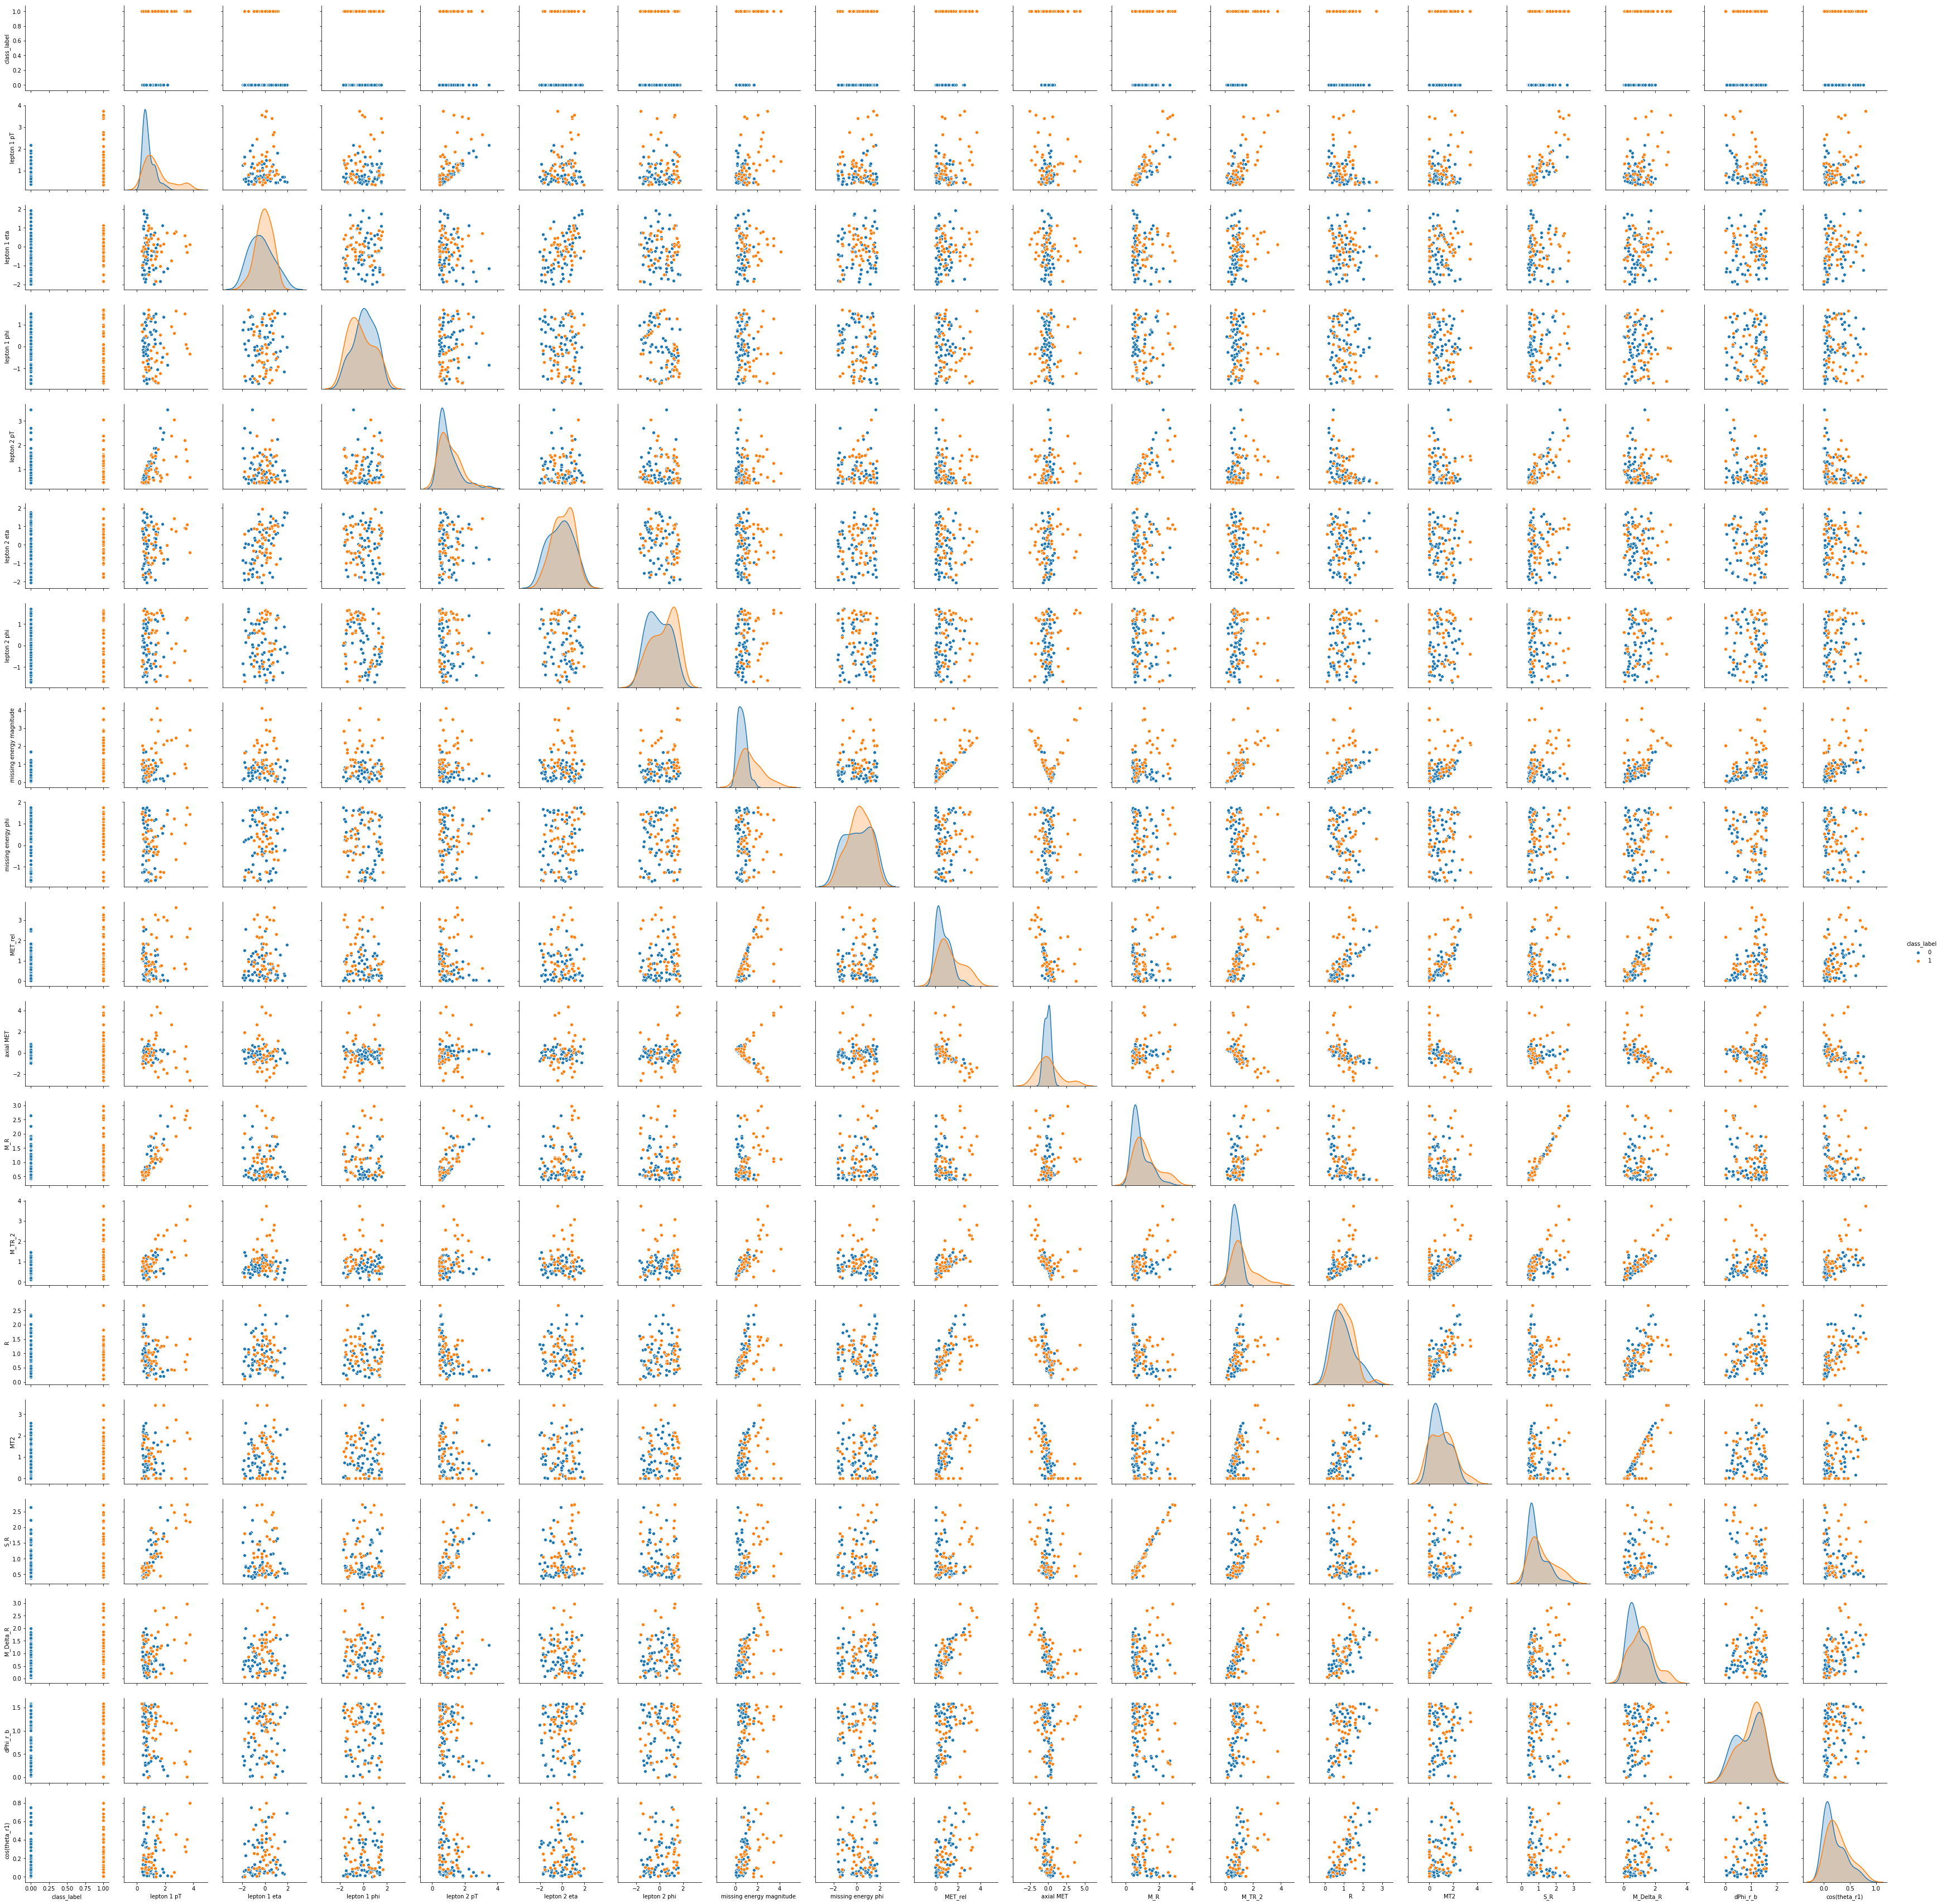

In [9]:
# A little EDA to see what sorts of feature engineering is already present
# We know already that lepton 1 pT to missing energy phi are "low level" 
# and the rest are high level; perhaps derived simply 

# sns.pairplot(raw_data.loc[all_vars[1:],range(1000),], hue = 'class_label')
sns.pairplot(df.loc[range(100),], hue = 'class_label')

There are some correlations; we might want to remove MT2 for its colinearity to M_Delta_R, for example or S_R and M_R or at least watch for those terms.  

## MODELS: separate test and training sets





In [10]:
target_variable = 'class_label'
y = df[target_variable]
X = df.drop(columns=target_variable, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
# for a bunch of long-running analyses, we want smaller data sets, so:
little_number = 50000
X_train_little = X_train[:little_number]
y_train_little = y_train[:little_number]

### Create scaled datasets

In [11]:
# Since standard scaler rescales everything, and it doesn't really make
# sense to have a scaled target variable (especially a 0 or 1!),
# we take a slightly different data structure approach in the scaled data.
# We separate out the target data and the features into two data frames enh.
scaler = StandardScaler()

X_cols = list(df.columns)
X_cols.remove('class_label')
# X_df_scaled = scaler.fit_transform(df[X_cols])
X_df_scaled = pd.DataFrame(scaler.fit_transform(df[X_cols]),columns=X_cols)
y_df_scaled = df['class_label']
print('Scaler Means:',scaler.mean_)
print('Scaler Sigs: ',scaler.scale_)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_df_scaled, y_df_scaled, test_size = 0.30)
# for a bunch of long-running analyses, we want smaller data sets, so:
X_train_scaled_little = X_train_scaled[:little_number]
y_train_scaled_little = y_train_scaled[:little_number]

Scaler Means: [ 1.00048817e+00  3.60407484e-04 -1.99595052e-03  9.99262644e-01
  9.32197041e-04 -3.20164302e-04  1.00115885e+00  1.71922897e-04
  1.00156610e+00  3.07102447e-03  9.99660901e-01  9.99875858e-01
  1.00052640e+00  1.00024008e+00  9.99196450e-01  1.00023080e+00
  9.99071606e-01  2.25273556e-01]
Scaler Sigs:  [0.68372582 1.00214741 1.00198371 0.65229542 1.00312634 1.00189636
 0.87306768 1.0016542  0.88909365 1.00268238 0.62623182 0.58122846
 0.47072033 0.85887081 0.61807269 0.62339637 0.43610532 0.19705284]


## Just for fun, create a PCA version of this data set


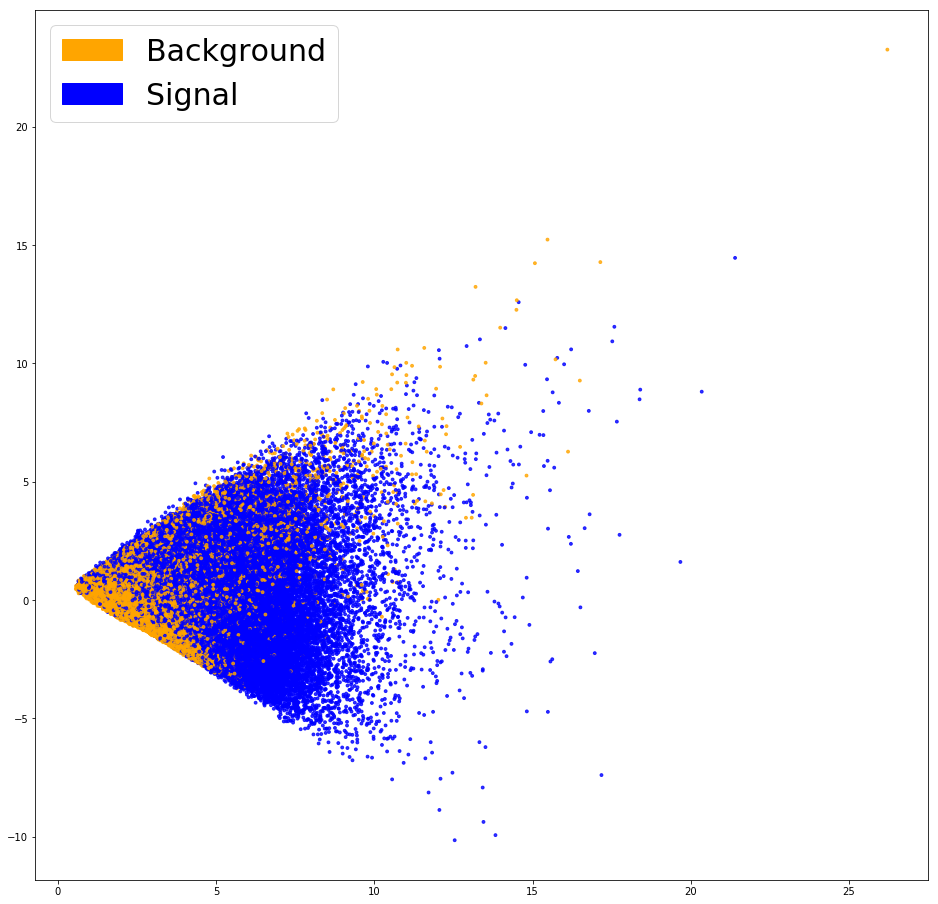

In [12]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Background')
            green_patch = mpatches.Patch(color='blue', label='Signal')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train, y_train)
plt.show()

## MODEL 1: LOGISTIC REGRESSION


In [13]:
%%time
# This took 11 minutes for 2C's and L2 / L1 reg.  Got indistinguishable results. 
# The issue is L1 regularization, so we can do that really sparsely if at all.
# This was also only with 1/10 of the data rows.  
param_grid = [
    {'penalty': ['l2', 'l1'],
     'C': [0.001, 1,1000]}
]
# [0.001, 0.01, 0.1, 1, 10, 100, 1000]
logreg_classifier = LogisticRegression()

grid_search = GridSearchCV(logreg_classifier,
                           param_grid,
                           cv = 5,
                           n_jobs = -1)

# This takes a long time to run so it's commented out.
# grid_search.fit(X_train, y_train)
# cvres = grid_search.cv_results_
# zipped = zip(cvres["mean_test_score"], cvres["params"])
# for mean_score, params in zipped:
#     print(mean_score, params)


CPU times: user 67 µs, sys: 2 µs, total: 69 µs
Wall time: 71.3 µs


Cool. So the cross-validation does not do too much; pick and save a model and find the confusion matrix for that model in the test sample.  Also make a pretty plot.  And do an ROC curve.  Those are all really good habits!



In [14]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Confusion matrix, without normalization
[[71730  9614]
 [21947 46709]]
Normalized confusion matrix
[[0.88 0.12]
 [0.32 0.68]]


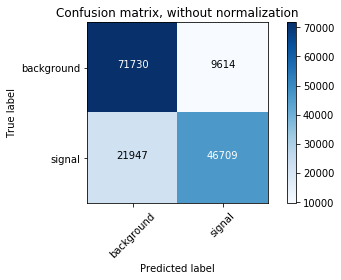

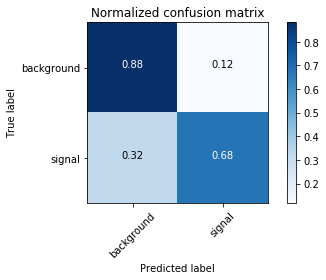

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: 
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Predict in test sample:
y_pred = model.fit(X_train, y_train).predict(X_test)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

#
class_names = ['background','signal']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



#### ROC curve


In [16]:
# calculate the fpr and tpr for all thresholds of the classification
# taken from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
def plot_roc_curve(model,X_test,y_test):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.axes().set_aspect(aspect='equal',adjustable='box')
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

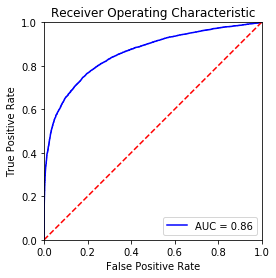

In [17]:
plot_roc_curve(model,X_test[:15000],y_test[:15000])

#### Playing with logistic regression 1: print out stats on features

In [18]:
# Turns out we can get a nice report
import statsmodels.api as sm
logit_model=sm.Logit(y_train_little,X_train_little)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.456982
         Iterations 8
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.338     
Dependent Variable:     class_label        AIC:                45734.2383
Date:                   2019-02-04 07:40   BIC:                45892.9943
No. Observations:       50000              Log-Likelihood:     -22849.   
Df Model:               17                 LL-Null:            -34502.   
Df Residuals:           49982              LLR p-value:        0.0000    
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         8.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
lepton 1 pT               2.1582   0.084

How totally cool!  Domain knowledge helps interpret this... of course the angles (phi) don't make a difference (low z score).  One might consider some more feature engineering like interaction terms (phi1-phi2... would that work?) to improve the model.  Then again, perhaps the higher level features incorporate that information already. 

Anyway, maybe for a another day...

Actually, perhaps we can just try deep learning on the first 8 variables when we get to neural nets...


#### Playing with logistic regression 2: try fit with rescaled data... more efficient?

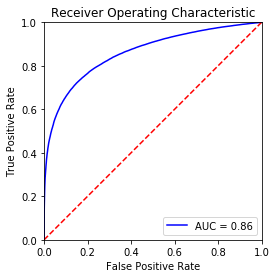

In [19]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train_scaled, y_train_scaled)

plot_roc_curve(model,X_test_scaled,y_test_scaled)

#### Playing with logistic regression 3: remove the angular variables and replace them with trig functions and interaction terms to see if we can improve the fit.

#### Playing with logistic regression 4: 

### MODEL 2: RANDOM FOREST


In [20]:
%%time
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

# this take a long time even on the 10% sample.  use the _little subsample
# time is ~ 2 minute with 50000 samples. 
# Train the model on training data
rf.fit(X_train_little, y_train_little);

CPU times: user 1min 40s, sys: 91.2 ms, total: 1min 40s
Wall time: 1min 40s


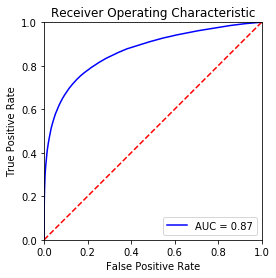

In [21]:
plot_roc_curve(rf,X_test,y_test)


#### I should probably do a cross-validation grid search here, but it's a lot like the one for logistic...

### MODEL 3: NAIVE BAYES:

In [22]:
%%time
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)


CPU times: user 478 ms, sys: 32 ms, total: 510 ms
Wall time: 131 ms


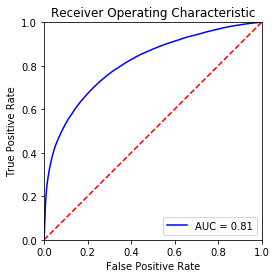

In [23]:
plot_roc_curve(model,X_test,y_test)

### MODEL 4: Xgboost

In [24]:
%%time
#model = XGBClassifier()
# This is a bit of a cheat!  I'm using the tuned hyperparameters from below 
model = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 6, subsample = 0.8)   
## 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'subsample': 0.8
model.fit(X_train_little, y_train_little)

CPU times: user 9.31 s, sys: 7.93 ms, total: 9.32 s
Wall time: 9.11 s


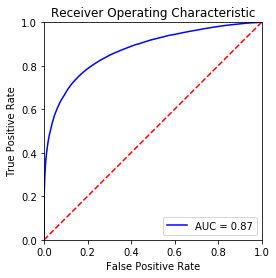

In [25]:
plot_roc_curve(model,X_test,y_test)

#### Examine Feature Importance in XGBoost

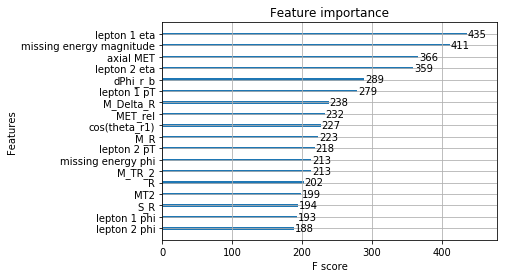

In [26]:
from xgboost import plot_importance
# plot feature importance
plot_importance(model)


In [27]:
# Plotting routine for algorithm convergence
def plt_error(model):
    model_metric = list(model.evals_result()['validation_0'].keys())[0]
    model_error  = list(model.evals_result()['validation_0'].keys())[1]
    n = len(model.evals_result()['validation_0'][model_metric])
    plt.title('Classification Error')
    plt.plot(range(n), model.evals_result()['validation_0'][model_metric], 'b', label = 'Train ' + model_metric)
    plt.plot(range(n), model.evals_result()['validation_1'][model_metric], 'y', label = 'Test ' + model_metric)
    plt.plot(range(n), model.evals_result()['validation_0'][model_error], 'b', label = 'Train ' + model_error)
    plt.plot(range(n), model.evals_result()['validation_1'][model_error], 'y', label = 'Test ' + model_error)
    plt.legend(loc = 'right')
    plt.xlim([0, n])
    plt.ylim([0, 1])
    plt.ylabel(model_error + ' / ' + model_metric)
    plt.xlabel('Estimators')
    plt.show()

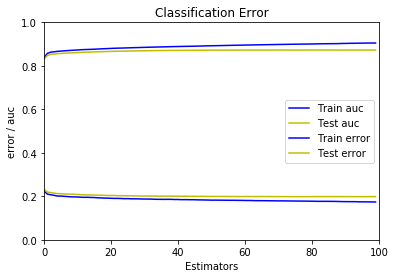

In [28]:
#### XGBoost playing around
eval_set = [(X_train_little, y_train_little), (X_test, y_test)]
eval_metric = ["auc","error"]
#model = XGBClassifier()
model = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 6, subsample = 0.8)   
model.fit(X_train_little, y_train_little,eval_metric=eval_metric,eval_set=eval_set,verbose=False)
plt_error(model)


#### XGboost wins again!

So try hyperparameter tuning by parameter and then deploy.

In [29]:
%%time
# suggestions from https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e  
param_grid = [
    {'max_depth': [3, 6],
     'learning_rate': [0.01, 0.1],
     'subsample': [0.8, 1.0],
     'colsample_bytree': [0.3, 0.8]
    }
]
model = XGBClassifier()
grid_search = GridSearchCV(model,
                           param_grid,
                           cv = 5,
                           n_jobs = -1)

# This takes a long time to run so it's commented out.
# grid_search.fit(X_train_little, y_train_little)
# cvres = grid_search.cv_results_
# zipped = zip(cvres["mean_test_score"], cvres["params"])
# for mean_score, params in zipped:
#     print(mean_score, params)
    
# and the winner is: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'subsample': 0.8}


CPU times: user 463 µs, sys: 4 µs, total: 467 µs
Wall time: 297 µs


### MODEL 5: SVM:

In [30]:
%%time
model = svm.SVC(kernel='linear', C=1, gamma=1, probability=True) # Probability true necessary for the ROC plot
model.fit(X_train_scaled_little, y_train_scaled_little)

# https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f
# this article suggests that you use a gaussian kernel when you have a large number of 
# features so we can try 


CPU times: user 12min 30s, sys: 104 ms, total: 12min 30s
Wall time: 12min 30s


In [31]:
print(model.score(X_test_scaled, y_test_scaled))


0.7890666666666667


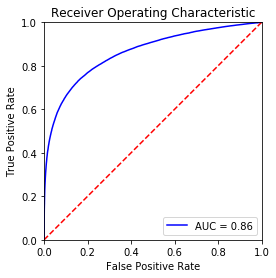

In [32]:
plot_roc_curve(model,X_test_scaled,y_test_scaled)


0.7708133333333334


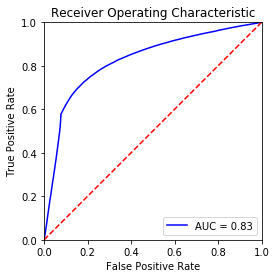

CPU times: user 57min 2s, sys: 228 ms, total: 57min 2s
Wall time: 57min 4s


In [33]:
%%time
model = svm.SVC(kernel='rbf', C=1, gamma=1, probability=True) # Probability true necessary for the ROC plot
model.fit(X_train_scaled_little, y_train_scaled_little)
print(model.score(X_test_scaled, y_test_scaled))
# plot_roc_curve(model,X_test_scaled,y_test_scaled)

# Gak that took an hour!  Try with scaled features instead. 
# see https://stackoverflow.com/questions/43529388/speed-of-svm-kernels-linear-vs-rbf-vs-poly for
# info on SVM taking a long time with non-scaled features
# and there's a nice resource on SVM process here: https://www.csie.ntu.edu.tw/~r95162/guide.pdf

In [34]:
print(model.score(X_test_scaled[:15000], y_test_scaled[:15000]))

0.7688


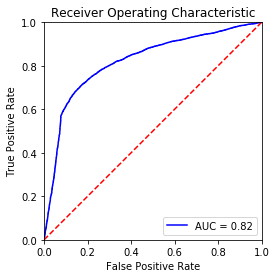

In [35]:
plot_roc_curve(model,X_test_scaled[:15000], y_test_scaled[:15000])


### MODEL 6: NEURAL NET:

Just a simple implementation based on [this link](https://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html)

A few keys:
- use scaled data


In [140]:
%%time
# Pre-process starting from the scaled data
X_cols = list(df.columns)
X_cols.remove('class_label')
X = df[X_cols]
y = df['class_label']
X_tr, X_te, y_tr, y_te = train_test_split(X, y)
scaler = StandardScaler()

# Fit only to the training data... that's a good idea!
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)
mlp = MLPClassifier(hidden_layer_sizes=(18,18,18),verbose=True)
mlp.fit(X_tr,y_tr)
predictions = mlp.predict(X_te)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_te,predictions))


Iteration 1, loss = 0.45967427
Iteration 2, loss = 0.43361469
Iteration 3, loss = 0.43110656
Iteration 4, loss = 0.42996456
Iteration 5, loss = 0.42913004
Iteration 6, loss = 0.42846485
Iteration 7, loss = 0.42798510
Iteration 8, loss = 0.42759102
Iteration 9, loss = 0.42715071
Iteration 10, loss = 0.42714676
Iteration 11, loss = 0.42696115
Iteration 12, loss = 0.42666971
Iteration 13, loss = 0.42655593
Iteration 14, loss = 0.42645136
Iteration 15, loss = 0.42625945
Iteration 16, loss = 0.42608019
Iteration 17, loss = 0.42593488
Iteration 18, loss = 0.42577268
Iteration 19, loss = 0.42583555
Iteration 20, loss = 0.42564595
Iteration 21, loss = 0.42554826
Iteration 22, loss = 0.42542108
Iteration 23, loss = 0.42543911
Iteration 24, loss = 0.42528289
Iteration 25, loss = 0.42525621
Iteration 26, loss = 0.42510180
Iteration 27, loss = 0.42513881
Iteration 28, loss = 0.42499393
Iteration 29, loss = 0.42494185
Iteration 30, loss = 0.42490748
Iteration 31, loss = 0.42478530
Iteration 32, los

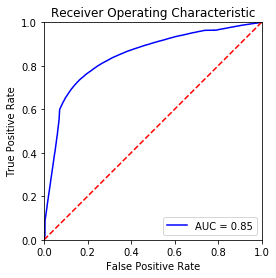

In [141]:
plot_roc_curve(model,X_te, y_te)

In [131]:
%%time
# Here I replicate simpler example from 
# https://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html
# not sure why the loss function changes much more rapidly!
# perhaps because the SUSY example is not a great classifier anyway ... ROC = 0.86 max.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
X_tr, X_te, y_tr, y_te = train_test_split(X, y)
scaler = StandardScaler()
# Fit only to the training data... that's a good idea!
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),verbose=True)
mlp.fit(X_tr,y_tr)
predictions = mlp.predict(X_te)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_te,predictions))


Iteration 1, loss = 0.87742278
Iteration 2, loss = 0.77027073
Iteration 3, loss = 0.68472747
Iteration 4, loss = 0.61429623
Iteration 5, loss = 0.55698796
Iteration 6, loss = 0.50599901
Iteration 7, loss = 0.46160896
Iteration 8, loss = 0.42304100
Iteration 9, loss = 0.38843069
Iteration 10, loss = 0.35647283
Iteration 11, loss = 0.32905673
Iteration 12, loss = 0.30314226
Iteration 13, loss = 0.27859777
Iteration 14, loss = 0.25679177
Iteration 15, loss = 0.23615829
Iteration 16, loss = 0.21695021
Iteration 17, loss = 0.19920555
Iteration 18, loss = 0.18265743
Iteration 19, loss = 0.16849210
Iteration 20, loss = 0.15535963
Iteration 21, loss = 0.14354601
Iteration 22, loss = 0.13321784
Iteration 23, loss = 0.12373118
Iteration 24, loss = 0.11541994
Iteration 25, loss = 0.10828502
Iteration 26, loss = 0.10210133
Iteration 27, loss = 0.09659593
Iteration 28, loss = 0.09174366
Iteration 29, loss = 0.08754342
Iteration 30, loss = 0.08390131
Iteration 31, loss = 0.08074199
Iteration 32, los